# Data Analyst Associate Case Study Submission

## Data Validation

I began analyzing the data on legal claims made against the Brazilian Vivendo food chain by reading in the csv data from all for locations into a pandas DataFrame. I assessed the data visually using random rows collected through the `.sample` function. After documenting the issues I spotted visually, I assessed the data programatically using the `.info` and `.describe` functions. <br>

I validated each column of the dataframe by checking its values against the criteria in the data dictionary. All fields matched the diectionary's description, and only the `Cause` column had null values. As instructed, I replaced all null values in the column with the string `'unknown'` <br>

My assessment revealed five issues affecting the data quality and tidiness, which are:

> 1. The presence of spaces in the column names. This did not conform to best practices, and would have made it difficult to access the columns using dot notation.
2. The special characters in the `Claims Amount` column. These characters would have keep the columns as strings, making it challenging to make calculations with the numbers.
3. Multiple data entries of the year and ids of claims in the `claims_id` column. Without splitting these values, it would have been challenging to use the long unique identifiers.
4. The minimum value in the `Time to Close` column was an invalid negative value of $-57$.
5. The `Time to Close` column name was ambiguous. The [data documentation](https://s3.amazonaws.com/talent-assets.datacamp.com/Associate+DA+Case+Study+-++Food+Claims+Process+.pdf) showed that the time frame indicates days, so a more specific column name should communicate that.

I created `claims_clean`, a copy of the original `claims` DataFrame, to ensure the safety of the original data. I solved the quality and tidiness issues through these five cleaning tasks on the `claims_clean` copy:

> 1. I renamed the columns by writing a for loop to change all names to lowercase and replace all spaces with underscores.
2. I wrote a regular expression to extract parts of the claim amounts into two columns as strings. I concatenated the values in these columns in string formats, then added the concatenated column to the original dataframe as an integer column.
3. I wrote another regular expression to capture and extract the ID and year values from the `claims_id` column. I saved the four-digit IDs into the new `claims_id` column, and created a new `years` column for the extracted years.
4. I checked for any other negative time values and found that $-57$ was the only existing one. I surmised that it must have been an entry error, so I replaced the value with $57$.
5. Finally, I renamed the `time_to_close` column to `days_to_close` to avoid ambiguity.

## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

I began analyzing the cleaned dataframe by reviewing the customer's questions and deciding the order in which i would answe them.


### Analysis Question 1: How do the number of claims differ across locations?
I used the `.value_counts` method to count the number of claims across the differnt locations. The Series returned showed that the **Sao Luis** location of Vivendo had the highest count of legal claims with 30 claims filed since 2012. The **Recife** location came next with 25 claims files, while **Fortaleza** and **Natal** followed closely with 22 and 21 claims filed respectively. I visualised this data in a barplot as shown below.

![Barplot of Claims across Locations](attachment:count_by_loc.png)

<br>
I decided to also check how the yearly trends for these counted claims varied by location. I created a 4-plot subplot visualisation to illustrate the trends as well

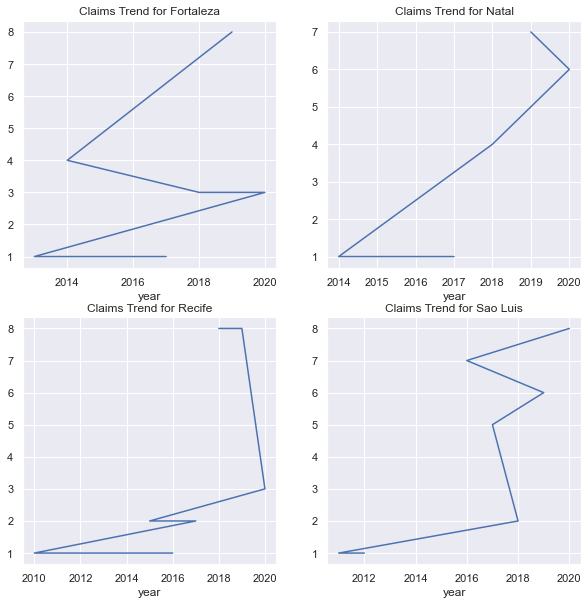
The line plots shows that the distribution of claims over years is largely random, but the count has increased across all locations over time.

### Analysis Question 2: What is the distribution of time to close claims?

I viewed the summary statistics of the time to close claims to find that the mean time is about $833.5$ days. Then, I visualised the data in a histogram, using Seaborn.

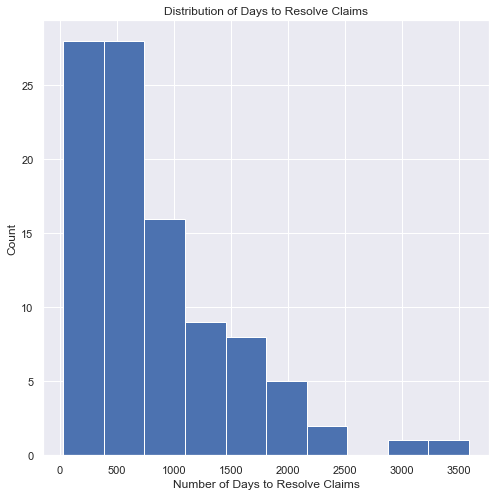

The histogram showed that a majority of legal claims against the Vivendo food chain are resolved in less than 750 days. The summary statistics corroborated this by returning $685.452$ as the 50th percentile of the data. However, the mean is much higher because of outlier values of up to 3591 days before resolving a claim!

### Analysis Question 3: How does the average time to close claims differ by location?
To answer this question, i grouped the time to close claims by location, extracted the `days_to_close` column, and found the sorted means of these values. The results are displayed in a bar chart below.

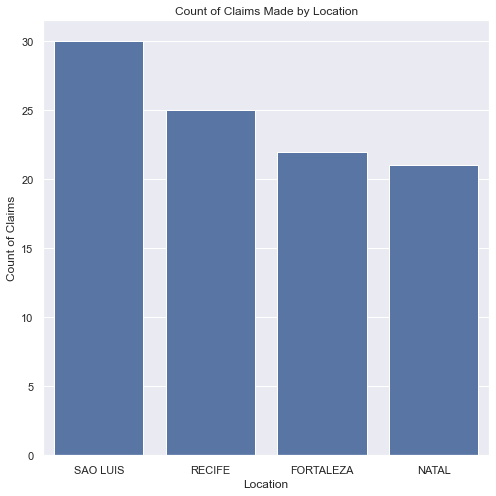

As the distribution shows, **Sao Luis**, the location with the highest count of legal claims, also takes the most time- about 1030 days on the average- to close legal claims. **Recife** followed with an average of 860 days to solve a claim, then **Fortaleza** with an average of 775 days. The **Natal** location closes claims the fastest, with a much lower average rate of 581 days.<br>

To visualise the distribution of time to close claims including not just the means, but also the quartiles and outliers, I included a boxplot.

![Boxplot of Time to Close Claims](distribution.png)

This boxplot shows that the **Sao Luis** food chain has msot number of claims, as well as the highest values and widest range of times to close those claims. The situation at that location of the Vivendo fast food chain would be worth investigating. The **Natal** location, on the other hand, has the lowest number of legal claims made against them, and the fastest rate for closing any claims. The procedures and legal structure of that location would be worth investigating, with a view to improving the time for **Recife** and **Fortaleza** to close their claims.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric, have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study